In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns   # for visualization
from sklearn import tree
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import string 
from scipy import stats # stats library
#from autoviz.AutoViz_Class import AutoViz_Class
import pandas_profiling # library for automatic EDA
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing

In [146]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
b1=pd.read_csv("C:/Users/Admin/Desktop/Data Science/Imarticus/Projects/Cancer Data/cancerdata.csv")
b1=pd.DataFrame(b1)
display(b1.head(10))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,843786,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,...,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,844359,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,...,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428
7,84458202,M,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,...,17.06,28.14,110.60,897.0,0.1654,0.388596,0.2678,0.085846,0.3196,0.082534
8,844981,M,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,...,15.49,30.73,106.20,739.3,0.1703,0.315621,0.5390,0.107188,0.4378,0.095350
9,84501001,M,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,...,15.09,40.68,97.65,711.4,0.1853,0.241266,1.1050,0.197198,0.4366,0.072885


In [57]:
# feature names as a list
col = b1.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [4]:
b1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,1.250206e+08,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,8.670000e+03,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,8.692180e+05,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,9.060240e+05,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,8.813129e+06,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,9.113205e+08,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [5]:
# y includes our labels and x includes our features
y = b1.diagnosis                          # M or B 
x = b1.drop(['id','diagnosis'],axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Benign:  357
Number of Malignant :  212


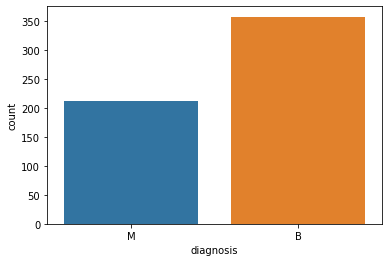

In [6]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

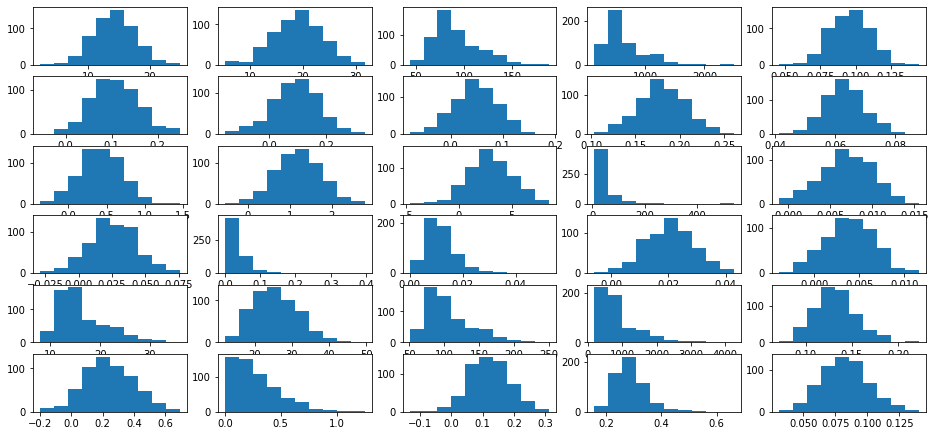

In [70]:
plt.figure(figsize=(16,10))
for r,c in zip(range(1,31),x.columns[0:31]): 
    plt.subplot(8,5,r)
    plt.hist(x[c])

In [ ]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
#second 10 
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
#second 20-31
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")

plt.xticks(rotation=90)

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [ ]:
sns.jointplot(x.loc[:,'radius_se'], x.loc[:,'radius_worst'], kind="reg", color="#ce1414")

In [ ]:
x.head()

In [ ]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.distplot, lw=3)

In [ ]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data ,size=4)

plt.xticks(rotation=90)

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.distplot(data['diagnosis'])
plt.xticks(rotation=90)

<AxesSubplot:>

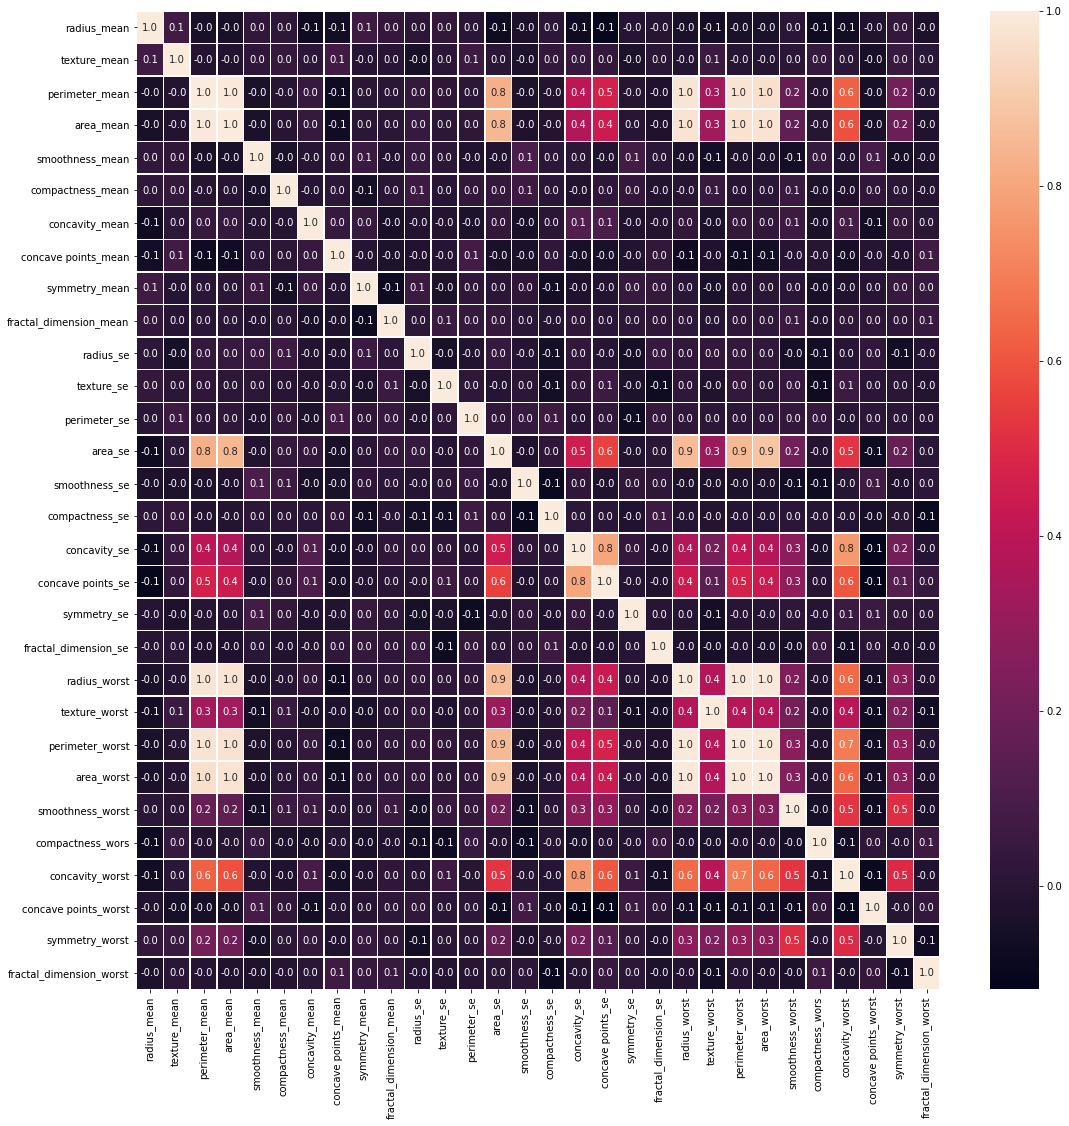

In [154]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
data = pd.concat([y,x],axis=1)
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [73]:
for col in x.columns:
    percentiles = x[col].quantile([0.01,0.90]).values
    x[col] = np.clip(x[col], percentiles[0], percentiles[1])

In [ ]:
x.describe()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

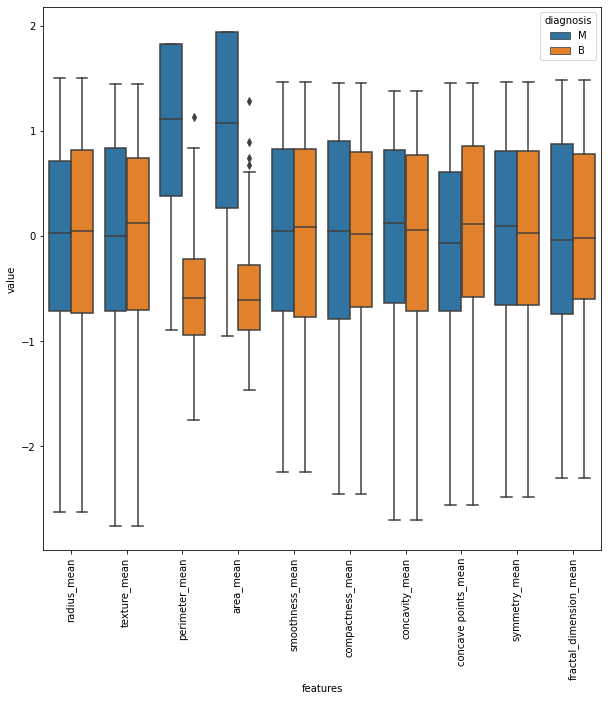

In [74]:
#second 20-31
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

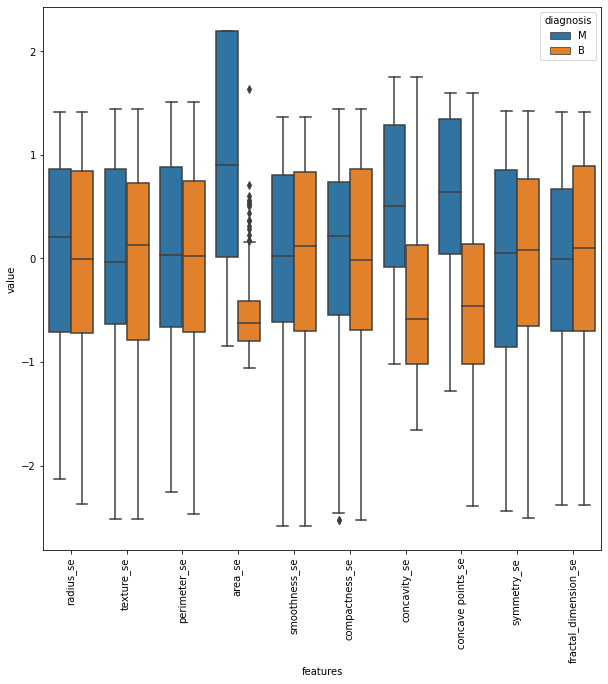

In [75]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_wors'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

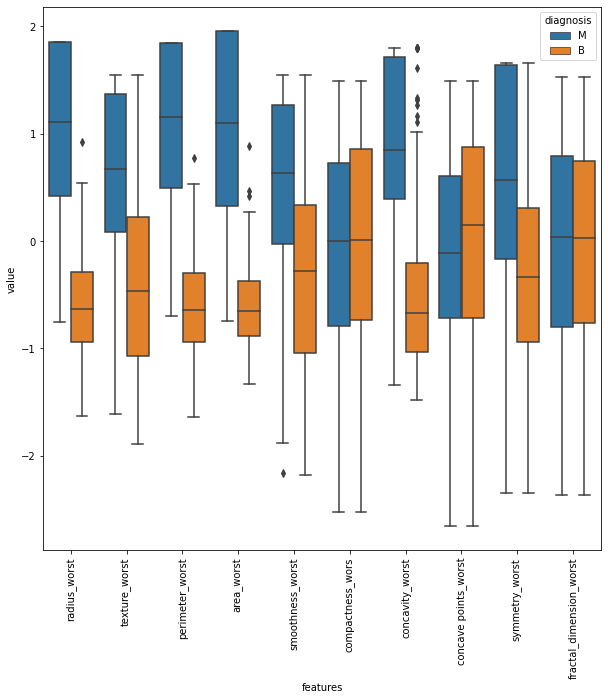

In [76]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

In [ ]:
#!pip install sweetviz
#import sweetviz as sv

#report1 = sv.analyze(b1)

In [ ]:
#report1.show_html()

In [ ]:
from sklearn.utils import resample

In [77]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)


In [78]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [79]:
del b1['diagnosis']

In [80]:
b1['diagnosis'] = Y

In [81]:
# Seperate Majority and Minority
benign = b1[b1['diagnosis'] == 0]
malignant = b1[b1['diagnosis'] == 1]

In [83]:
# Upsampling minority
from sklearn.utils import resample
malignant_upsample = resample(malignant,replace = True, n_samples = len(benign), random_state = 15)

In [84]:
# Combine majority and malignant_upsample
upsampled = pd.concat([benign, malignant_upsample])
upsampled = pd.DataFrame(upsampled)

In [86]:
# Check New class count
upsampled

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
19,8510426,18.064020,17.256319,87.46,566.3,0.094533,0.173426,-0.008696,0.031112,0.195844,...,19.26,99.70,711.2,0.14400,0.162891,0.23900,0.040374,0.2977,0.089192,0
20,8510653,16.794223,19.608331,85.63,520.0,0.094760,0.071197,0.136537,0.033793,0.148269,...,20.49,96.09,630.5,0.13120,0.226332,0.18900,0.077135,0.3184,0.081565,0
21,8510824,20.894925,22.117574,60.34,273.9,0.103727,0.118173,0.094977,0.045926,0.171161,...,15.66,65.13,314.9,0.13240,0.049483,0.08867,0.119339,0.2450,0.087455,0
37,854941,13.327318,11.165145,82.61,523.8,0.085342,0.089397,0.084382,0.085479,0.162958,...,22.81,84.46,545.9,0.09701,0.125138,0.04833,0.255697,0.1987,0.071683,0
46,85713702,14.142920,18.248664,51.71,201.9,0.093035,0.105048,0.298702,0.037793,0.155931,...,21.96,57.26,242.2,0.12970,0.394503,0.06880,0.062752,0.3105,0.052305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,861799,8.916944,15.261424,100.20,728.2,0.109790,0.087076,0.064438,0.155826,0.227021,...,25.84,107.50,830.9,0.12570,0.033752,0.28460,0.118899,0.2556,0.057699,1
265,88995002,11.801178,18.988256,135.70,1419.0,0.095659,0.105569,0.092231,0.064631,0.185921,...,47.16,214.00,3432.0,0.14010,0.292386,0.34420,0.150424,0.2868,0.130668,1
3,84348301,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,26.50,98.87,567.7,0.20980,0.224998,0.68690,0.110799,0.6638,0.086210,1
168,8712766,14.187737,15.279967,116.10,984.6,0.084129,0.093026,0.121081,0.070504,0.202562,...,32.33,155.30,1660.0,0.13760,0.166101,0.48900,0.091900,0.2160,0.063638,1


In [91]:
from sklearn import preprocessing
# Get column names first
names = upsampled.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(upsampled)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [92]:
scaled_df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.009329,0.697308,0.454559,0.301776,0.179343,0.492680,0.753163,0.316481,0.354111,0.585597,...,0.192964,0.245480,0.129276,0.494668,0.405134,0.190895,0.399909,0.278336,0.532199,0.0
1,0.009329,0.641585,0.543426,0.289130,0.159703,0.494980,0.416731,0.628122,0.365039,0.283631,...,0.225746,0.227501,0.109443,0.407729,0.476291,0.150958,0.484419,0.319141,0.462340,0.0
2,0.009330,0.821539,0.638234,0.114367,0.055313,0.585851,0.571326,0.538944,0.414508,0.428932,...,0.097015,0.073310,0.031877,0.415880,0.277931,0.070823,0.581442,0.174453,0.516289,0.0
3,0.000929,0.489444,0.224413,0.268261,0.161315,0.399542,0.476626,0.516209,0.575775,0.376863,...,0.287580,0.169580,0.088650,0.175508,0.362788,0.038602,0.894917,0.083185,0.371824,0.0
4,0.094046,0.525236,0.492053,0.054730,0.024772,0.477504,0.528133,0.976096,0.381351,0.332262,...,0.264925,0.034115,0.014009,0.397541,0.664916,0.054952,0.451355,0.303568,0.194319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.000936,0.295901,0.379185,0.389814,0.248017,0.647292,0.468988,0.473413,0.862595,0.783476,...,0.368337,0.284327,0.158695,0.370373,0.260288,0.227316,0.580431,0.195348,0.243734,1.0
710,0.097646,0.422471,0.519998,0.635132,0.541039,0.504095,0.529847,0.533050,0.490775,0.522610,...,0.936567,0.814732,0.797975,0.468179,0.550379,0.274920,0.652905,0.256850,0.912117,1.0
711,0.092547,0.586570,0.843872,0.233501,0.102906,0.462201,0.472101,0.752426,0.271679,0.483032,...,0.385928,0.241347,0.094008,0.941588,0.474795,0.548642,0.561810,1.000000,0.504886,1.0
712,0.009551,0.527202,0.379886,0.499689,0.356776,0.387248,0.488568,0.594957,0.514721,0.628233,...,0.541311,0.522387,0.362466,0.451199,0.408734,0.390575,0.518364,0.117288,0.298130,1.0


In [95]:
X = scaled_df.iloc[:, 1:30]
Y = scaled_df.iloc[:, 31]
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.525475,0.517275,0.361418,0.241175,0.510716,0.528339,0.533099,0.418841,0.485323,0.472022,...,0.500558,0.328220,0.378627,0.313947,0.195246,0.430576,0.495428,0.238734,0.584948,0.272754
std,0.151590,0.172441,0.174419,0.158883,0.138517,0.165638,0.170998,0.169072,0.168229,0.147446,...,0.170636,0.180808,0.161326,0.175732,0.151883,0.156017,0.174959,0.161058,0.146467,0.129088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.422555,0.395828,0.235298,0.128091,0.415767,0.412270,0.423079,0.307987,0.372360,0.373769,...,0.382811,0.192458,0.261327,0.181458,0.088847,0.326903,0.368296,0.110363,0.485135,0.189336
50%,0.524377,0.519323,0.325962,0.193404,0.508948,0.528083,0.536403,0.421838,0.485674,0.461723,...,0.502392,0.283885,0.375800,0.275113,0.145067,0.430823,0.489548,0.214736,0.577675,0.253006
75%,0.621551,0.636060,0.468592,0.328155,0.611109,0.641850,0.654159,0.523587,0.605849,0.569816,...,0.616690,0.442903,0.492138,0.413815,0.264402,0.529817,0.617292,0.331150,0.678063,0.326237
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of Benign:  357
Number of Malignant :  357


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


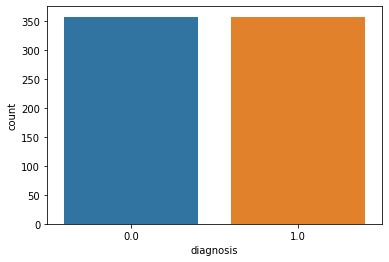

In [117]:
ax = sns.countplot(Y,label="Count")       # M = 357, B = 357
B2, M2 = Y.value_counts()
print('Number of Benign: ',B2)
print('Number of Malignant : ',M2)

In [96]:

#M=1 ,B=0
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


499
499
215
215


In [101]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9767441860465116


<AxesSubplot:>

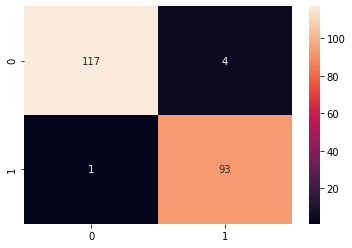

In [113]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=6).fit(X_train, y_train)

In [106]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [6.64769249e-03 1.42071306e-02 2.14836109e+01 2.32546295e+01
 1.01947554e-03 5.42441225e-03 2.44181912e-02 1.63310586e-01
 2.11763930e-02 2.59823930e-03 9.36445119e-02 3.16531773e-01
 1.71893133e-03 1.57291897e+01 2.77809546e-02 1.73952916e-02
 1.80562031e+00 4.92526851e+00 4.98232239e-02 8.68774938e-02
 2.75693552e+01 7.40907759e+00 2.77640301e+01 2.75490728e+01
 4.81675773e+00 1.12550443e-01 2.39934900e+01 9.43977597e-02
 4.27294083e+00]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst',

Accuracy is:  0.9813953488372092


<AxesSubplot:>

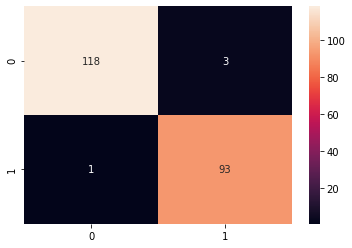

In [107]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [125]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [127]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst'],
      dtype='object')


In [110]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['radius_mean', 'perimeter_mean', 'area_mean', 'fractal_dimension_mean',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


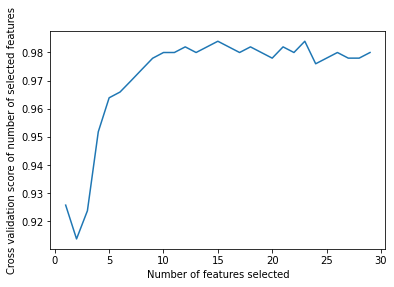

In [114]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 22 (0.201022)
2. feature 20 (0.141944)
3. feature 23 (0.129686)
4. feature 26 (0.122564)
5. feature 3 (0.060833)
6. feature 2 (0.060367)
7. feature 21 (0.037591)
8. feature 13 (0.037495)
9. feature 17 (0.034926)
10. feature 16 (0.030950)
11. feature 24 (0.029779)
12. feature 28 (0.027568)
13. feature 9 (0.007707)
14. feature 0 (0.007293)
15. feature 11 (0.006523)
16. feature 27 (0.006174)
17. feature 15 (0.005709)
18. feature 12 (0.005400)
19. feature 10 (0.005212)
20. feature 18 (0.005073)
21. feature 8 (0.004813)
22. feature 4 (0.004585)
23. feature 14 (0.004441)
24. feature 1 (0.004243)
25. feature 25 (0.003974)
26. feature 7 (0.003866)
27. feature 19 (0.003822)
28. feature 5 (0.003422)
29. feature 6 (0.003016)


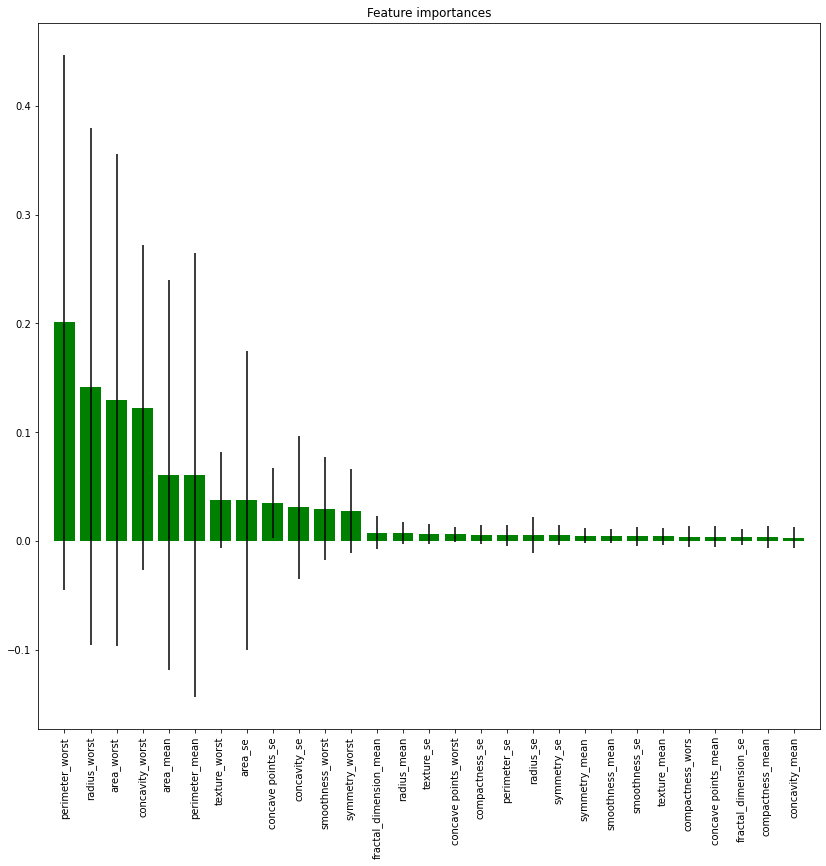

In [116]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Minimum error:- 0.037209302325581395 at K = 1


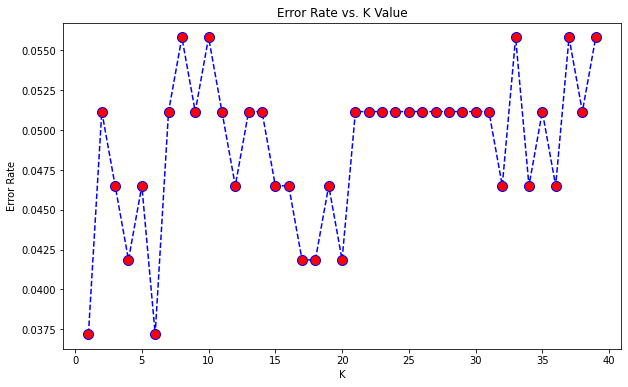

In [135]:
X_train_knn = X_train.loc[:,['perimeter_worst','radius_worst','area_worst','concavity_worst','area_mean','perimeter_mean']]
x_test_knn = X_test.loc[: , ['perimeter_worst','radius_worst','area_worst','concavity_worst','area_mean','perimeter_mean']]

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_knn,y_train)
 pred_i = knn.predict(x_test_knn)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.9627906976744186 at K = 0


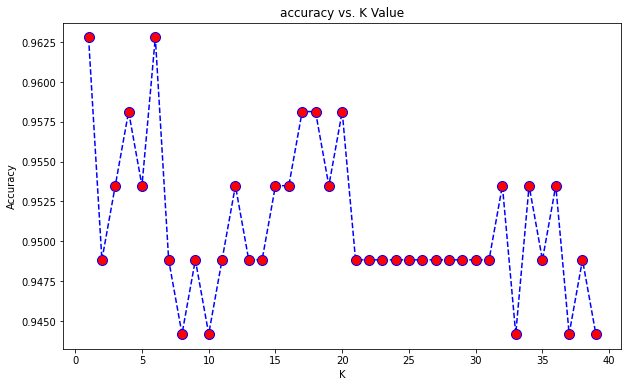

In [136]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_knn,y_train)
    yhat = neigh.predict(x_test_knn)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [137]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Model Accuracy ,how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,yhat))

Accuracy: 0.9441860465116279


In [138]:
cn_knn=pd.crosstab(y_test,yhat,rownames=["Actual"],
                  colnames=['Predicted'],
                  margins=True)
cn_knn

Predicted,0.0,1.0,All
Actual,,,
0.0,112,9,121
1.0,3,91,94
All,115,100,215


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       121
           1       0.91      0.97      0.94        94

    accuracy                           0.94       215
   macro avg       0.94      0.95      0.94       215
weighted avg       0.95      0.94      0.94       215



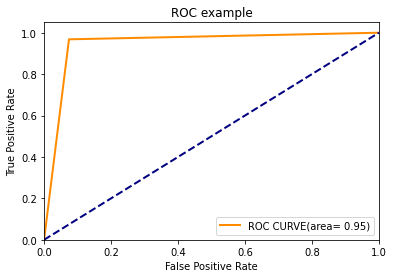

In [140]:
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,yhat)
fpr1
tpr1
df1=pd.DataFrame(dict(fpr=fpr1,tpr=tpr1))
auc=metrics.auc(fpr1,tpr1)
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='darkorange',lw=lw,label='ROC CURVE(area= %0.2f)'% auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()

In [141]:
from sklearn import svm
from sklearn.svm import SVC
svcT=svm.SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(X_train_knn,y_train)

In [144]:
confusion_matrix=confusion_matrix(y_test,svcT.predict(x_test_knn))
confusion_matrix

array([[114,   7],
       [  3,  91]], dtype=int64)

In [145]:
print(classification_report(y_test,svcT.predict(x_test_knn)))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       121
         1.0       0.93      0.97      0.95        94

    accuracy                           0.95       215
   macro avg       0.95      0.96      0.95       215
weighted avg       0.95      0.95      0.95       215



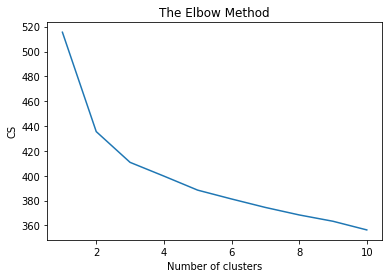

In [147]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 714 samples in 0.005s...
[t-SNE] Computed neighbors for 714 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 714 / 714
[t-SNE] Mean sigma: 0.338178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.636246
[t-SNE] KL divergence after 1900 iterations: 1.314401


Text(0.5, 1.0, 'Actual clusters')

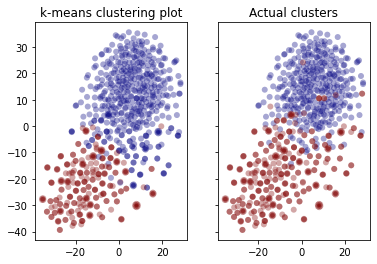

In [153]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y_c = tsne.fit_transform(X)

#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y_c[:,0],Y_c[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y_c[:,0],Y_c[:,1],  c = scaled_df['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')